# Deep Learning

## Shallow and Deep Networks

(1000, 2)


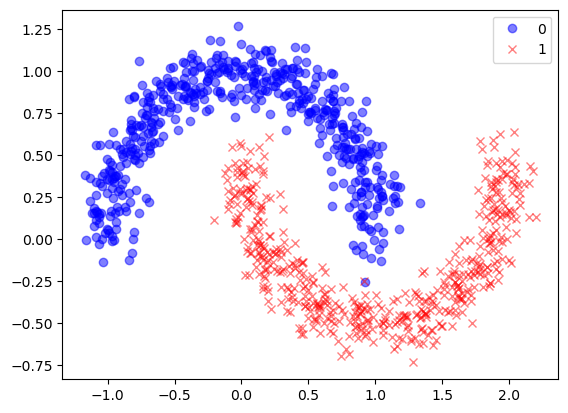

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import plot_model

# create datset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# data exploration
print(X.shape)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])
plt.show()

## Shallow Model

In [2]:
# create model
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])

# visualize model architecture
plot_model(model, to_file='shallow_model_plot.png', show_shapes=True, show_layer_names=True, 
           show_layer_activations=True, rankdir="LR", dpi=256)

# train model
model.fit(X_train, y_train, epochs=200, verbose=0)

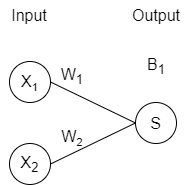

### Model evaluation

The model has only 1 layer (excluding the input layer), which is the output layer.

Since it has no hidden layers, it will not recognise any patterns. Instead, it will immediately return a output based on the inputs, weights and the bias.

This means there's a possibility for underfitting!

In [3]:
results = model.evaluate(X_test, y_test)
print("The Accuracy score on the train set is:\t{:0.3f}".format(results[1]))

10/10 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8467
The Accuracy score on the train set is:	0.847


319/319 [==============================] - 1s 2ms/step


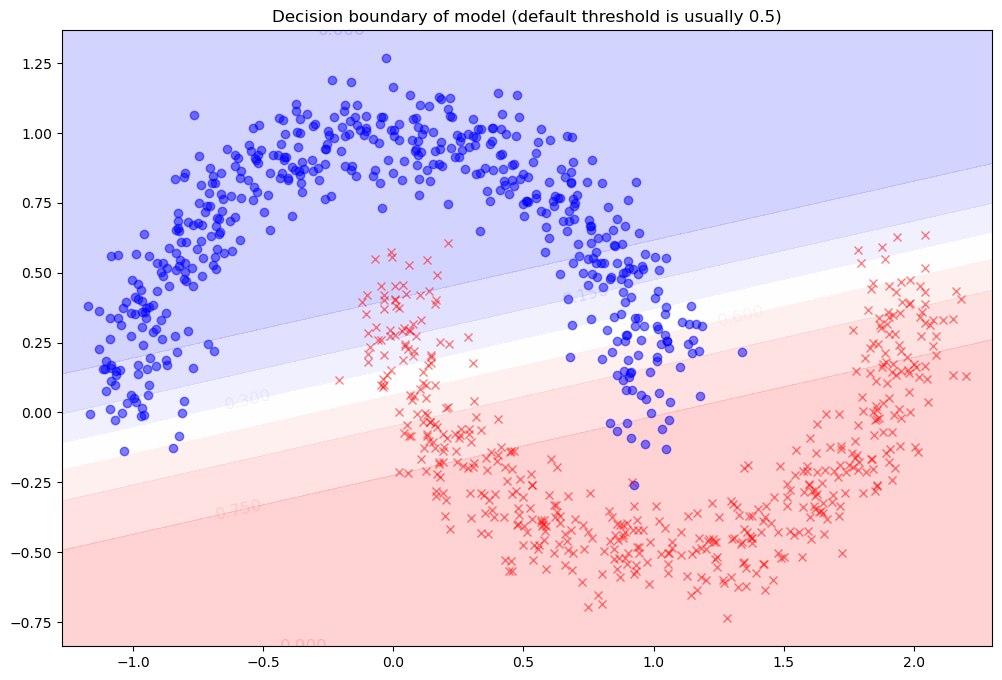

In [4]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    CS = plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.clabel(CS, inline=True, fontsize=12)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.title("Decision boundary of model (default threshold is usually 0.5)")
    
plot_decision_boundary(model, X, y)

## Deep model

In [5]:
# create model
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])

# visualize model architecture
plot_model(model, to_file='deep_model_plot.png', show_shapes=True, show_layer_names=True, 
           show_layer_activations=True, rankdir="LR", dpi=256)

# train model
model.fit(X_train, y_train, epochs=100, verbose=0)

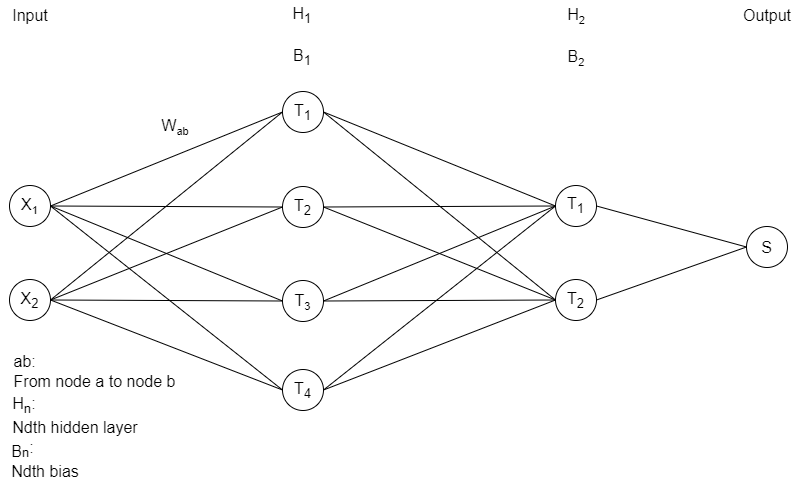

### Model evaluation

This model has 2 hidden layers and a output layer (3 total). This means it can recognise patterns better than the last model (as long as it doesn't overfit).

Adam is the optimizer used to train. It improves gradient descent by adding momentum, this helps the algoritm to find the best local minimum for the cost.

Figure correction: B3 should be added above the last layer!

In [6]:
# evaluate
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9967


[0.008202399127185345, 0.996666669845581]

In [7]:
threshold = 0.5
y_train_pred = model.predict(X_train)
y_train_pred = y_train_pred > threshold

y_test_pred = model.predict(X_test)
y_test_pred = y_test_pred > threshold

print("The Accuracy score on the train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

10/10 [==============================] - 0s 2ms/step
The Accuracy score on the train set is:	0.997
The Accuracy score on the test set is:	0.997


The model has better accuracy for the training set as for the test set, but the test set is still getting a really good accuracy.

This means the model does not have any drastic overfitting.

319/319 [==============================] - 1s 2ms/step


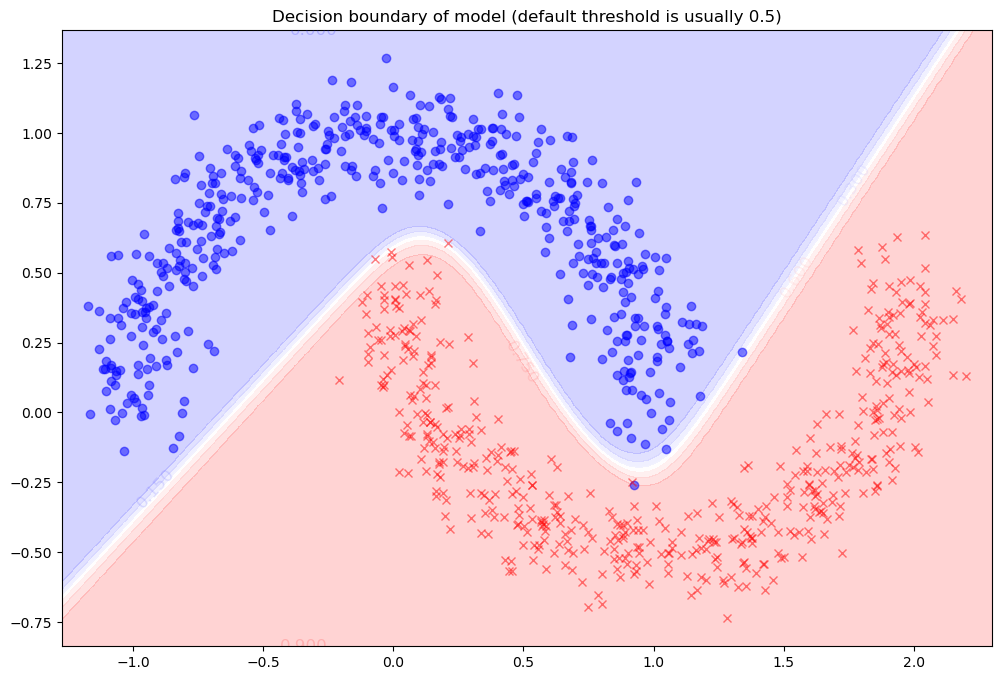

In [8]:
plot_decision_boundary(model, X, y)

## Multi-class classification with the Iris dataset

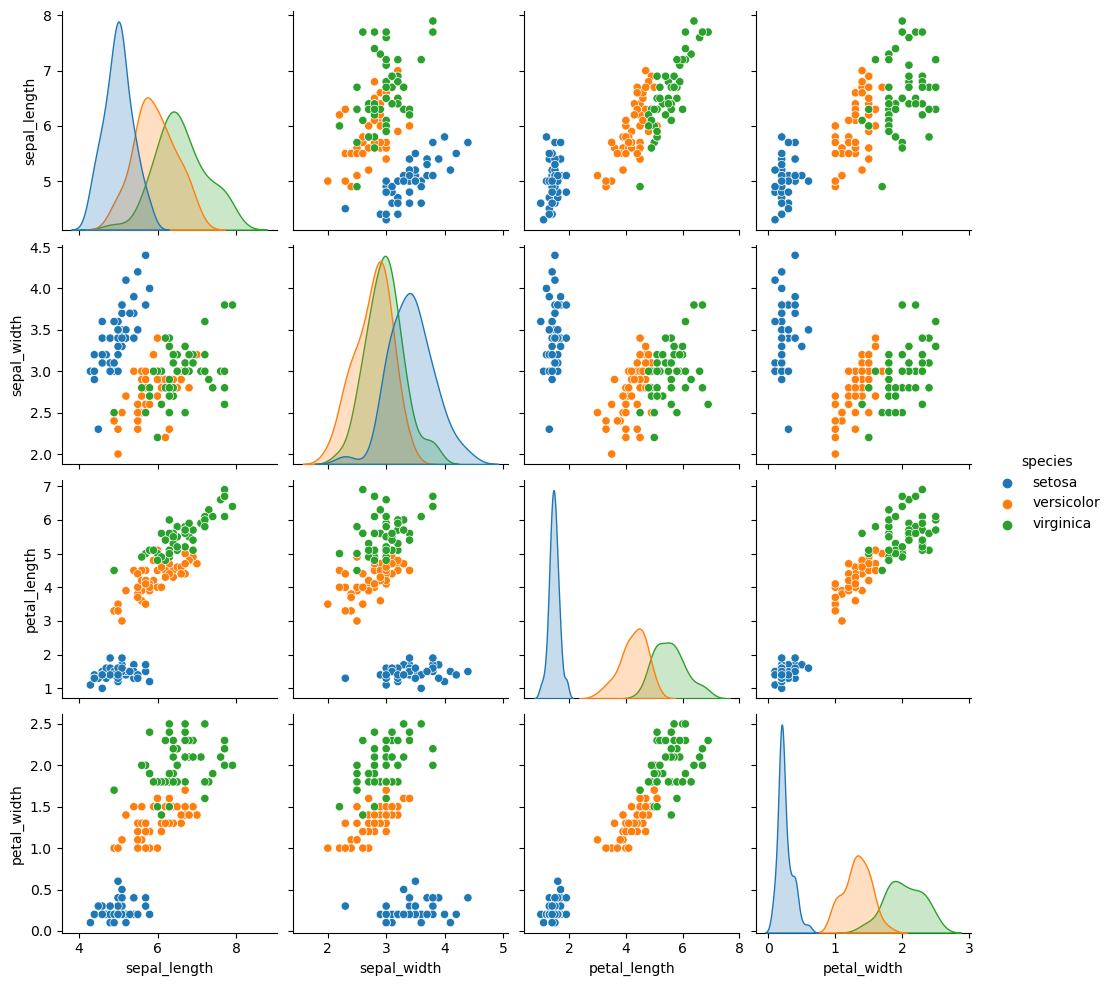

In [9]:
# read dataset
df = pd.read_csv('iris.csv')

# data exploration
sns.pairplot(df, hue="species")

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
# feature engineering
X = df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
# easier alternative for transforming strings to numerical labels is to use sklearn.preprocessing.LabelEncoder()
target_names = df['species'].unique()
print(target_names)

target_dict = {n:i for i, n in enumerate(target_names)}
print(target_dict)
y = df['species'].map(target_dict) 

y.head()

['setosa' 'versicolor' 'virginica']
{'setosa': 0, 'versicolor': 1, 'virginica': 2}


0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [13]:
# easier alternative for one-hot encoding is to use pandas.get_dummies()
from tensorflow.keras.utils import to_categorical 
y_cat = to_categorical(y)
y_cat[:10]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2)

In [15]:
# create model
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# visualize model architecture
plot_model(model, to_file='iris_model_plot.png', show_shapes=True, show_layer_names=True, 
           show_layer_activations=True, rankdir="LR", dpi=256)

# train model
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
4/4 [==============================] - 1s 78ms/step - loss: 2.3265 - accuracy: 0.5185 - val_loss: 0.8445 - val_accuracy: 0.6667
Epoch 2/20
4/4 [==============================] - 0s 17ms/step - loss: 0.9822 - accuracy: 0.4537 - val_loss: 0.9235 - val_accuracy: 0.3333
Epoch 3/20
4/4 [==============================] - 0s 17ms/step - loss: 0.9350 - accuracy: 0.4815 - val_loss: 0.4057 - val_accuracy: 0.9167
Epoch 4/20
4/4 [==============================] - 0s 19ms/step - loss: 0.5696 - accuracy: 0.7130 - val_loss: 0.5704 - val_accuracy: 0.6667
Epoch 5/20
4/4 [==============================] - 0s 19ms/step - loss: 0.6127 - accuracy: 0.6574 - val_loss: 0.2656 - val_accuracy: 0.9167
Epoch 6/20
4/4 [==============================] - 0s 19ms/step - loss: 0.6291 - accuracy: 0.6389 - val_loss: 0.2100 - val_accuracy: 0.9167
Epoch 7/20
4/4 [==============================] - 0s 16ms/step - loss: 0.5037 - accuracy: 0.6944 - val_loss: 0.5246 - val_accuracy: 0.6667
Epoch 8/20
4/4 [===========

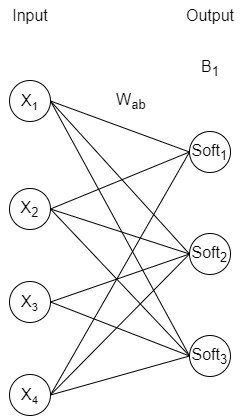

### Model evaluation

The model has 1 layer and this is the output layer. It uses softmax because this is a suitable function for classification where there are more than 2 possibilities. There are 3 neurons in this layer because there are 3 different species in the dataset.

In [16]:
# evaluate model
y_pred = model.predict(X_test)
print(f'\n\n{y_pred[:5]}')

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
print(f'\n\n{y_pred_class[:5]}')

print('\n\nclassification report:')
print(classification_report(y_test_class, y_pred_class))

print('\n\nconfusion matrix:')
confusion_matrix(y_test_class, y_pred_class)

1/1 [==============================] - 0s 55ms/step


[[1.0069432e-03 1.9322221e-01 8.0577087e-01]
 [9.9360788e-01 6.3818297e-03 1.0158923e-05]
 [1.8154713e-03 3.1458870e-01 6.8359578e-01]
 [9.7966468e-01 2.0268941e-02 6.6282999e-05]
 [9.1343910e-02 6.8805325e-01 2.2060286e-01]]


[2 0 2 0 1]


classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



confusion matrix:


array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  9]], dtype=int64)

### F-Score
The F-Score is a value representing both the precision and recall in a single number. Precision is what ratio of predicted positives was an actual positive. Recall is what ratio of actual positives was predicted as positive.

### Categories
Category 0 seems to have a perfect score with these weights. Between 1 and 2, it seems to missclassify 1 as 2 in some cases, which explains why 2 has a perfect recall but not a perfect precision. The scores are still pretty good despite this.

### Overfitting?
With the current learning rate and other set params, the model does not seem to overfit. With a very low rate, it gets really good scores on the training set but poor scores on the test set (overfitting). 0.1 seems about right

## Questions about Iris classification

* Why do we perform one-hot encoding of the label y during the feature engineering step?

ML algoritmes are not able the process non-numerical data so we need the convert the categorical column data to numerical.

* Why do we use np.argmax() during the evaluation step?

The output softmax neurons each return a propability of that species being true (0.1, 0.2, 0.7 for example). Argmax just returns the category with the highest propability (the 3th one in that case). That is the category that you want to compare against the actual value.